In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

### Create dataset

An linear function with added noise is applied to a uniformly created set of values (X).

In [2]:
def create_dataset(m, x_min = 0.0, x_max = 1.0, a = 0.8, b=1.2):
    X = np.sort(np.random.uniform(x_min, x_max, m))
    Y = a*X+b
    Y += np.random.normal(0, 0.03, m)
    return X, Y

Text(0, 0.5, 'y')

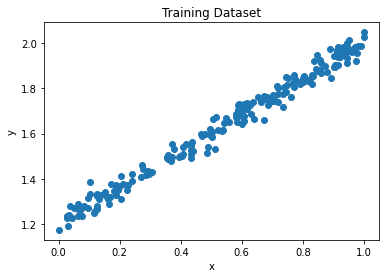

In [3]:
X, Y = create_dataset(m=200)
plt.plot(X, Y, 'o')
plt.title('Training Dataset')
plt.xlabel('x')
plt.ylabel('y')

### Hypothesis

A 2 parameter (with bias) linear function as hypothesis:

$$h_{\theta}(x) = \theta_0 + \theta_1 \cdot x$$

In [4]:
class H:
    def __init__(self, theta=[0.0, 0.0]):
        self.theta = theta
    def __call__(self, x):
        return self.theta[0] + self.theta[1]*x

In [5]:
h = H()

### Cost Function

Mean squared error:

$$J(\theta)=\frac{1}{2m}\sum_{i=0}^{m-1}{(h_{\theta}(x^{(i)})-y^{(i)})^2}$$

In [6]:
def MSE(h, X, Y):
    m = X.shape[0]
    return (1/(2*m))*np.sum(np.abs(h(X)-Y))

### Costs

$\theta_0=2.0$, $\theta_1=-0.7$

cost = 0.19380051715743535


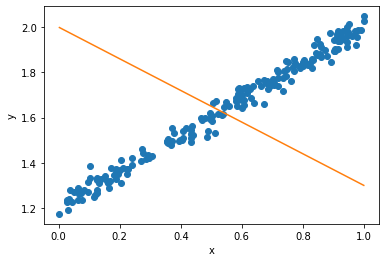

In [7]:
h.theta = [2.0, -0.7]
Y_ = h(X)
plt.plot(X, Y, 'o')
plt.plot(X, Y_)
plt.xlabel('x')
plt.ylabel('y')
J = MSE(h, X, Y)
print(f'cost = {J}')

$\theta_0=-0.2$, $\theta_1=0.3$

cost = 0.8371542157195004


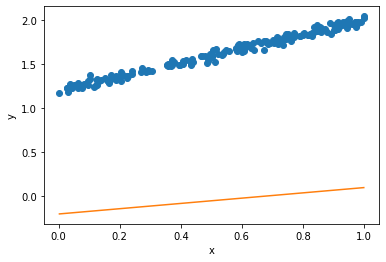

In [8]:
h.theta = [-0.2, 0.3]
Y_ = h(X)
plt.plot(X, Y, 'o')
plt.plot(X, Y_)
plt.xlabel('x')
plt.ylabel('y')
J = MSE(h, X, Y)
print(f'cost = {J}')

### Sweeping costs

Values to test with $\theta_0$ and $\theta_1$

In [9]:
thetas_0 = np.arange(0.0, 2.2, 0.1)
thetas_1 = np.arange(0.0, 2.2, 0.1)
print(f'thetas_0: {thetas_0}')
print(f'thetas_1: {thetas_1}')

thetas_0: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1]
thetas_1: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1]


Cost for each thetas combination

In [10]:
costs = np.zeros((len(thetas_0),len(thetas_1)))
for i, theta_0 in enumerate(thetas_0):
    for j, theta_1 in enumerate(thetas_1):
        h.theta = [theta_0, theta_1]
        costs[i, j] = MSE(h, X, Y)

/home/camilo/anaconda3/envs/vision/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'theta_1')

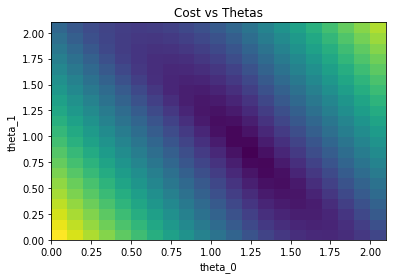

In [11]:
plt.pcolor(thetas_0, thetas_1, np.transpose(costs) )
plt.title('Cost vs Thetas')
plt.xlabel('theta_0')
plt.ylabel('theta_1')

In [12]:
i, j = np.unravel_index(costs.argmin(), costs.shape)
best_theta_0 = thetas_0[i]
best_theta_1 = thetas_1[j]

$\theta$ values combination that produces the minimum cost

In [13]:
print(f'best_theta_0: {best_theta_0}')
print(f'best_theta_1: {best_theta_1}')

best_theta_0: 1.2000000000000002
best_theta_1: 0.8


Predicting with the selected theta

In [14]:
h.theta = [best_theta_0, best_theta_1]
Y_ = h(X)

Dataset and predicted data

cost = 0.012036130999267973


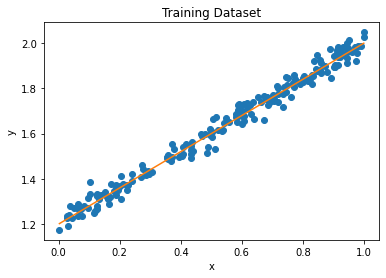

In [15]:
plt.plot(X, Y, 'o')
plt.plot(X, Y_)
plt.title('Training Dataset')
plt.xlabel('x')
plt.ylabel('y')
J = MSE(h, X, Y)
print(f'cost = {J}')